# pandas 时间序列数据

本章出现过的函数

* df.bfill() 向后填充缺失值
* df.ffill() 向前填充缺失值
* df.interpolate() 插值法填充缺失值
* df.rolling().corr() 计算数据帧df 的移动相关性
* df.rolling().mean() 计算数据帧df 滚动均值
* df.rolling().std() 计算数据帧df MA 平均值
* joypy.joyplot() 绘制山脊图
* numpy.random.uniform() 生成满足均匀分布的随机数
* plotly.express.bar() 绘制可交互条形图
* plotly.express.histogram() 绘制可交互直方图
* plotly.express.imshow() 绘制可交互热图
* plotly.express.line() 绘制可交互二维线图
* plotly.express.scatter() 绘制可交互散点图
* seaborn.heatmap() 绘制热图
* statsmodels.api.tsa.seasonal_decompose() 季节性调整
* statsmodels.regression.rolling.RollingOLS() 计算移动OLS 线性回归系数

## 什么是时间序列

时间序列是一系列按照时间顺序排列的数据点，通常是连续的。时间序列数据的特点是，数据点之间的时间间隔是固定的。时间序列数据可以是连续的，也可以是离散的。时间序列数据的例子包括股票价格、气温、降雨量、人口数量等。

时间序列数据的分析是一种重要的数据分析方法，它可以用来预测未来的趋势。时间序列数据的分析方法包括时间序列分解、平稳性检验、自相关性检验、白噪声检验、滚动统计量、移动平均、指数平滑、ARIMA 模型等。

时间序列分析通常包括以下几个步骤:
* 数据预处理:对数据进行清洗、转换、插值、平滑、去噪、填补缺失值等处理，以便更好地进行分析。
* 时间序列的可视化:对数据进行绘图,以了解数据的分布、趋势、周期性、相关性等。
* 时间序列的统计分析:对数据进行时间序列分解、平稳性检验、自相关性检验、白噪声检验、滚动统计量、移动平均、指数平滑、ARIMA 模型等统计分析,以评估数据的稳定性和相关性.
* 时间序列的建模和预测:根据统计分析的结果,建立合适的时间序列模型,进行未来趋势的预测和评估.

In [1]:
import pandas_datareader as pdr
import joypy
import pandas as pd
import datetime
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None # default='warn'

# 从 FRED 下载标普500(S&P 500)
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

ticker_list = ['SP500']
df = pdr.DataReader(ticker_list, 'fred', start_date, end_date)


# 双备份数据
df.to_csv('SP500_' + str(start_date.date()) + '_'
          + str(end_date.date()) + '.csv' )
df.to_pickle('SP500_' + str(start_date.date()) + '_'
            + str(end_date.date()) + '.pkl' )


/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/var/folders/mr/d7lt6chd66jgt7d560rj0sp00000gn/T/ipykernel_42666/1713555239.py:9: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



Percentage of missing data
3.492%


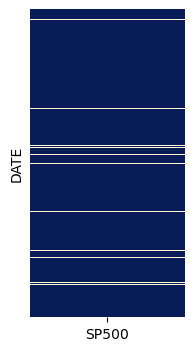

In [3]:
fig = px.line(df)
fig.update_layout(title='S&P 500', yaxis_title='S&P 500 index',
                  xaxis_title='Date', legend_title = 'Curve', showlegend=False)
fig.show()

# 计算缺失值比例
percentag_missing = df.isnull().sum()*100/len(df)
print("Percentage of missing data")
print("%.3f%%" % (percentag_missing))

# 可视化缺失值
fig , ax = plt.subplots(figsize = (2,4))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r",
            yticklabels= [])
plt.show()

### pandas 中的时间序列功能

在Python 中，Pandas 库提供了强大的时间序列处理和分析功能，使得时间序列的处理和分析变得更
加简单和高效。在 Pandas 中，时间序列分析的主要方法包括：

* 创建时间序列：可以通过 pandas.date_range() 方法创建一个时间范围，或者将字符串转换为时间序列对象。
* 时间序列索引：可以使用时间序列作为 DataFrame 的索引，从而方便地进行时间序列分析。
* 时间序列的切片和索引：可以使用时间序列的标签或位置进行切片和索引。
* 时间序列的重采样：可以将时间序列转换为不同的时间间隔，例如将日频率的数据转换为月频率的数据。
* 移动窗口函数：可以对时间序列数据进行滑动窗口操作，计算滑动窗口内的统计指标，例如均值、方差等。
* 时间序列的分组操作：可以将时间序列数据按照时间维度进行分组，从而进行聚合操作，例如计算每月的平均值、最大值等。
* 时间序列的聚合操作：可以对时间序列数据进行聚合操作，例如计算每周、每月、每季度的总和、平均值等。
* 时间序列的可视化：可以使用 Pandas、Matplotlib、Seaborn、Plotly 等库对时间序列数据进行可视化，例如绘制线形图、散点图、直方图等

## 缺失值

缺失值 (missing value) 指的是数据集中的某些值缺失或未被记录的情况。它们可能是由于测量设备故障、记录错误、样本丢失或数据清洗不完整等原因导致的。

缺失值可能在数据分析和建模中产生严重的影响，因为它们会导致数据样本的大小不一致，使得数据的统计分布和关系不准确或无法得出。

另外，**许多机器学习算法无法处理缺失值，必须对其进行处理或者删除**。

在数据处理中，通常需要对缺失值进行识别、处理或删除。一些处理缺失值的方法包括：
* 删除带有缺失值的样本或变量。
* 使用常量填充缺失值，例如用零、平均值、中位数等常量填充。
* 使用回归模型、插值方法等技术，对缺失值进行预测和填充。
* 对于分类变量，可以创建一个新的类别来表示缺失值

In [4]:
# 删除 NaN
df_ = df.dropna()
percentag_missing = df_.isnull().sum()*100/len(df_)
# 再次确认缺失值比例
print("Percentage of missing data")
print("%.3f%%" % (percentag_missing))

# 删除缺失值的时间序列线图
fig = px.line(df_, y = 'SP500', title = 'S&P 500 index')
fig.show()

Percentage of missing data
0.000%


/var/folders/mr/d7lt6chd66jgt7d560rj0sp00000gn/T/ipykernel_42666/3712464804.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [5]:
# 按年度分图展示时间序列趋势
df_['Year'] = pd.DatetimeIndex(df_.index).year
fig = px.line(df_, y = 'SP500', title = 'S&P 500 index',facet_col='Year', facet_row=None)
fig.update_layout(width=700,
                  height=500,
                  margin=dict(l=20, r=20, t=30, b=20),
                  paper_bgcolor="white")
fig.update_xaxes(matches=None)
fig.show()

/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

